In [1]:
import isaacgym 
import torch 
from isaacgymenvs.tasks.quadruped_motion_data import MotionLib 

device = torch.device('cpu')
motion_lib = MotionLib('isaacgymenvs/data/motions/quadruped/dog_trot.txt', device)

Importing module 'gym_37' (/home/daniel/Documents/isaacgym/python/isaacgym/_bindings/linux-x86_64/gym_37.so)
Setting GYM_USD_PLUG_INFO_PATH to /home/daniel/Documents/isaacgym/python/isaacgym/_bindings/linux-x86_64/usd/plugInfo.json
PyTorch version 1.8.1
Device count 1
/home/daniel/Documents/isaacgym/python/isaacgym/_bindings/src/gymtorch
Using /home/daniel/.cache/torch_extensions as PyTorch extensions root...
Emitting ninja build file /home/daniel/.cache/torch_extensions/gymtorch/build.ninja...
Building extension module gymtorch...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)


/home/daniel/Documents/isaacgym/python/isaacgym/torch_utils.py:135: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  def get_axis_params(value, axis_idx, x_value=0., dtype=np.float, n_dims=3):
2023-01-24 17:29:40,128 - INFO - logger - logger initialized


ninja: no work to do.
Loading extension module gymtorch...
Error: FBX library failed to load - importing FBX data will not succeed. Message: No module named 'fbx'
FBX tools must be installed from https://help.autodesk.com/view/FBX/2020/ENU/?guid=FBX_Developer_Help_scripting_with_python_fbx_installing_python_fbx_html
Loading 1/1 motion files: isaacgymenvs/data/motions/quadruped/dog_trot.txt
Loaded 1 motions with a total length of 0.533s.


<unknown>:6: DeprecationWarning: invalid escape sequence \*


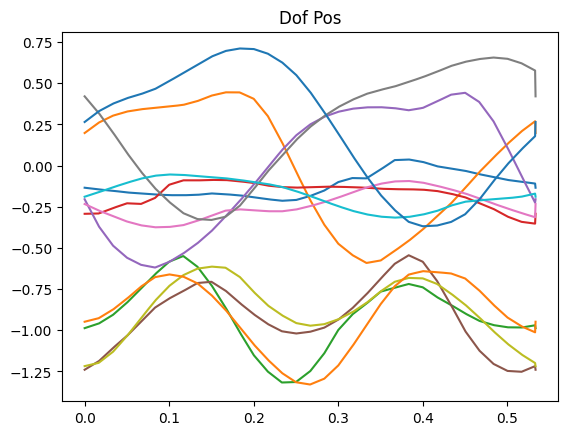

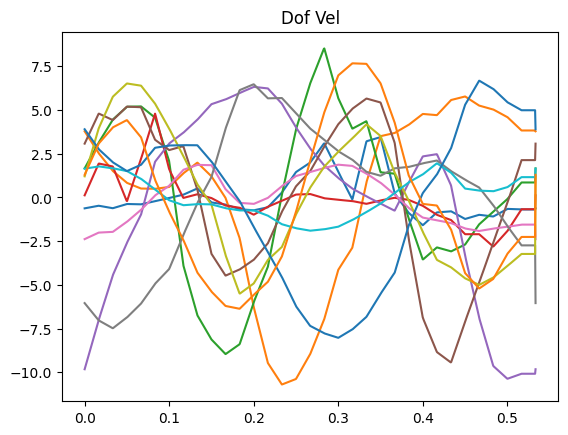

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def visualize(motion_lib: MotionLib):

    start_time = 0
    end_time = motion_lib.get_total_length()
    num_interp = 1000

    motion_ids = np.zeros(num_interp, dtype=np.int32)
    motion_times = np.linspace(start_time, end_time, num = num_interp)
    root_pos, root_rot, dof_pos, root_vel, root_ang_vel, dof_vel = motion_lib.get_motion_state(motion_ids, motion_times)

    plt.figure()
    assert dof_pos.shape[1] == 12
    for i in range(dof_pos.shape[1]):
        plt.plot(motion_times, dof_pos[:, i])
    plt.title("Dof Pos")
    plt.show()

    plt.figure()
    assert dof_vel.shape[1] == 12
    for i in range(dof_vel.shape[1]):
        plt.plot(motion_times, dof_vel[:, i])
    plt.title("Dof Vel")
    plt.show()
    

visualize(motion_lib)